In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('../../mogi_after_parsing.csv')
df.head()

,title,description,property_type,transaction_type,price,province,district,ward,street,location_latitude,location_longitude,owner_name,owner_contact,area,bedrooms,bathrooms
0,Cho thuê duplex ban công mới ở 3-4 người gần k...,Cho thuê duplex ban công mới ở 3-4 người gần k...,room,rent,3.1,TP. Thủ Đức,9,Long Trường,Võ Văn Hát,106.822266,10.793346,Thiên Hương,968364402,30.0,0,0
1,"Phòng q7 mới giá bình dân, sạch sẽ, yên tĩnh","💥 Còn 2 phòng duy nhấtỞ hẻm 77, đường chuyên d...",room,rent,2.2,TPHCM,7,Phú Mỹ,Chuyên Dùng,106.740146,10.706659,Kim Cúc,909634270,16.0,0,0
2,Phòng Trọ Giá Rẻ Gác Lớn Mới Cửa Sổ Thoáng Nga...,Phòng Trọ Giá Rẻ Đầy Đủ Tiện Nghi - Thang Máy ...,room,rent,3.0,TPHCM,12,Thạnh Lộc,Hà Huy Giáp,106.686352,10.877562,Quốc Vinh Megas,774823539,29.0,1,1
3,Cần Cho Thuê Phòng Mới Tinh 2tr4 Gác Cáo Cách ...,"Cho thuê phòng mới chưa qua sử dụng, gác cao r...",room,rent,2.4,TPHCM,Hóc Môn,Bà Điểm,Đông Lân - Hưng Lân,106.597206,10.842022,Trung Vũ,327266234,25.0,0,0
4,"Phòng trọ quận 7,nhiều cơ sở từ 2tr8","Phòng full nt, cổng khu chế xuất, gần Phú Mỹ H...",room,rent,3.0,TPHCM,7,Tân Quy,Nguyễn Thị Thập,106.705875,10.738993,Đức Tuấn,903977486,25.0,0,0


# Data exploration

In [3]:
# Drop columns that are not needed
df.drop(['title', 'description', 'transaction_type', 'owner_name', 'owner_contact', 'property_type', 'street'], axis=1, inplace=True)
df.head()

,price,province,district,ward,location_latitude,location_longitude,area,bedrooms,bathrooms
0,3.1,TP. Thủ Đức,9,Long Trường,106.822266,10.793346,30.0,0,0
1,2.2,TPHCM,7,Phú Mỹ,106.740146,10.706659,16.0,0,0
2,3.0,TPHCM,12,Thạnh Lộc,106.686352,10.877562,29.0,1,1
3,2.4,TPHCM,Hóc Môn,Bà Điểm,106.597206,10.842022,25.0,0,0
4,3.0,TPHCM,7,Tân Quy,106.705875,10.738993,25.0,0,0


In [4]:
df.shape

(54351, 9)

In [5]:
df.keys()

Index(['price', 'province', 'district', 'ward', 'location_latitude',
       'location_longitude', 'area', 'bedrooms', 'bathrooms'],
      dtype='object')

In [6]:
# Check Nan values in df and remove it
df.isnull().sum()
df.dropna(inplace=True)


# Data visualization

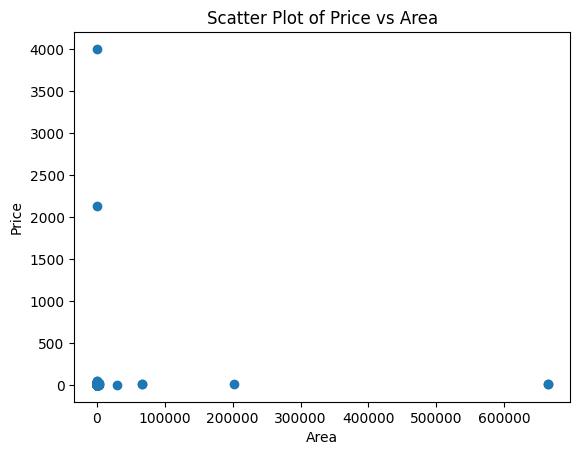

In [7]:
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Area')
plt.show()


# Data processing

In [8]:
# Change "quận 2" and "Quận 2 (Tp Thủ Đức)" to "Quận 2"
df['district'] = df['district'].replace('Quận 2 (Tp Thủ Đức)', 'Quận 2')

In [9]:
# Change province, ward, street from categorical to numerical value
from sklearn.preprocessing import LabelEncoder

le_district = LabelEncoder()
le_province = LabelEncoder()
le_ward = LabelEncoder()

df["district"] = le_district.fit_transform(df['district'])
df["province"] = le_province.fit_transform(df['province'])
df["ward"] = le_ward.fit_transform(df['ward'])
df.head()

,price,province,district,ward,location_latitude,location_longitude,area,bedrooms,bathrooms
0,3.1,20,11,174,106.822266,10.793346,30.0,0,0
1,2.2,22,9,225,106.740146,10.706659,16.0,0,0
2,3.0,22,3,291,106.686352,10.877562,29.0,1,1
3,2.4,22,34,49,106.597206,10.842022,25.0,0,0
4,3.0,22,9,341,106.705875,10.738993,25.0,0,0


In [10]:
# Spilt data into training and testing dataset
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# RANDOM FOREST ALGORITHM

In [11]:
re_model = RandomForestRegressor(n_estimators=100, random_state=42)
re_model.fit(X_train, y_train)
y_pred = re_model.predict(X_test)
y_pred

array([ 7.48909423,  6.63171849,  4.85056593, ...,  4.35687802,
       17.93966667,  6.3559836 ])

# Evaluation

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Predict the target variable
y_pred = re_model.predict(X_test)

print('---Random Forest Regressor---')

# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate the RSqared
rsquared = r2_score(y_test, y_pred)
print('R-squared:', rsquared)

# Calculate the RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)


---Random Forest Regressor---
Mean Absolute Error (MAE): 1.0224117823521994
Mean Squared Error (MSE): 2.113703707882156
R-squared: 0.8538495239266667
Root Mean Squared Error (RMSE): 1.4538582145044805


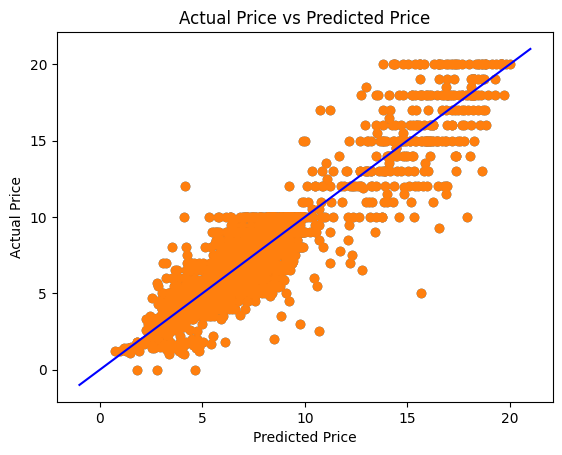

In [13]:
# do a scatter plot of the predicted price vs the actual price
plt.scatter(y_pred, y_test)
plt.ylabel('Actual Price')
import matplotlib.pyplot as plt



plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Price vs Predicted Price')

limits = [np.min([plt.xlim(), plt.ylim()]),  # min of both axes
          np.max([plt.xlim(), plt.ylim()])]  # max of both axes

plt.plot(limits, limits, 'b-')  # 'b-' means blue color, solid line


plt.xlim()
plt.ylim()
plt.show()

In [14]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare.head(20)

,Actual,Predicted
36293,6.000,7.489094
3360,6.500,6.631718
38540,5.900,4.850566
21777,6.000,7.422544
42020,8.000,8.647676
24798,5.500,5.698450
40916,4.700,4.519077
14211,9.500,9.309297
40060,6.100,6.689796
15467,8.000,7.674950


# KNN ALGORITHM

In [15]:
# Choose n_neighbors
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 50)}

knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_)

{'n_neighbors': 1}


In [16]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [17]:
# # KNN Regressor
# knn_model = KNeighborsRegressor(n_neighbors=knn_cv.best_params_['n_neighbors'])
# knn_model.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)
y_pred

array([ 9. ,  6.5,  4.7, ...,  5. , 20. ,  6. ])

In [18]:
X_test.head()

,province,district,ward,location_latitude,location_longitude,area,bedrooms,bathrooms
36293,22,82,24,106.661007,10.796330,40.0,1,1
3360,22,44,247,106.701730,10.723364,33.0,1,1
38540,22,16,4,106.704235,10.827872,31.0,1,1
21777,20,11,170,106.699433,10.675991,69.0,2,2
42020,22,3,354,106.615608,10.830711,78.0,3,2


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('---KNN Regressor---')

# Calculate the MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate the RSqared
rsquared = r2_score(y_test, y_pred)
print('R-squared:', rsquared)

# Calculate the RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

---KNN Regressor---
Mean Absolute Error (MAE): 1.3678464860620336
Mean Squared Error (MSE): 5.020887136631331
R-squared: 0.6528344807303258
Root Mean Squared Error (RMSE): 2.2407336157230584


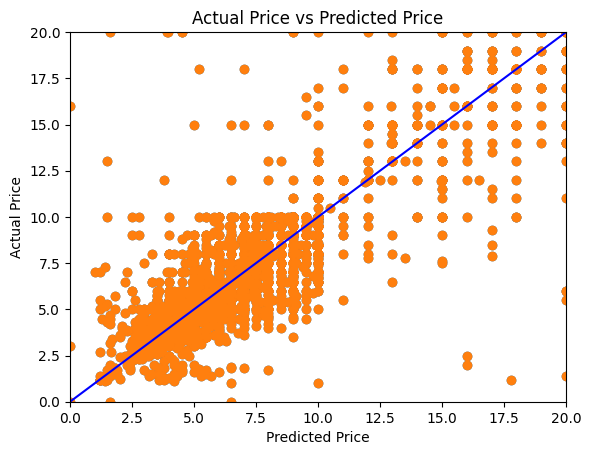

In [20]:
# do a scatter plot of the predicted price vs the actual price
plt.scatter(y_pred, y_test)
plt.ylabel('Actual Price')
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual Price vs Predicted Price')

limits = [np.min([plt.xlim(), plt.ylim()]),  # min of both axes
          np.max([plt.xlim(), plt.ylim()])]  # max of both axes

plt.plot(limits, limits, 'b-')  # 'b-' means blue color, solid line


plt.xlim(0, 20)
plt.ylim(0, 20)
plt.show()

In [21]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare.head(20)

,Actual,Predicted
36293,6.000,9.0
3360,6.500,6.5
38540,5.900,4.7
21777,6.000,5.5
42020,8.000,9.0
24798,5.500,6.5
40916,4.700,4.7
14211,9.500,9.5
40060,6.100,6.0
15467,8.000,8.0


In [22]:
# Save the models into pickle file
import pickle

with open('re_model.pkl', 'wb') as f:
		pickle.dump(re_model, f)

encoders = {
	'le_district': le_district,
	'le_province': le_province,
	'le_ward': le_ward
}
with open('label_encoder.pkl', 'wb') as f:
		pickle.dump(encoders, f)